# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
!wget 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv' -O 'apple.csv'

--2025-12-23 10:13:24--  https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8001::154, 2606:50c0:8002::154, 2606:50c0:8003::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8001::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 426412 (416K) [text/plain]
Saving to: ‘apple.csv’

apple.csv           100%[===================>] 416.42K  --.-KB/s    in 0.05s   

2025-12-23 10:13:25 (7.59 MB/s) - ‘apple.csv’ saved [426412/426412]



### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv('apple.csv')

### Step 4.  Check out the type of the columns

In [4]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)

### Step 6.  Set the date as the index

In [6]:
apple.set_index('Date', inplace = True)

### Step 7.  Is there any duplicate dates?

In [7]:
len(apple[apple.index.value_counts() > 1])

/var/folders/dj/x0ggdmrd4pjgkgmhkyycqqyh0000gp/T/ipykernel_74643/4138024778.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(apple[apple.index.value_counts() > 1])


0

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.sort_index(inplace = True)

### Step 9. Get the last business day of each month

In [9]:
apple.resample('BME').max()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,36.00,36.13,36.00,36.00,117258400,0.56
1981-01-30,34.50,34.75,34.50,34.50,13921600,0.54
1981-02-27,28.75,28.87,28.75,28.75,6966400,0.45
1981-03-31,26.75,27.00,26.75,26.75,57825600,0.42
1981-04-30,29.25,29.37,29.25,29.25,14504000,0.46
...,...,...,...,...,...,...
2014-03-31,546.52,549.00,539.59,544.99,93511600,77.42
2014-04-30,593.74,599.43,589.80,594.09,189977900,84.40
2014-05-30,637.98,644.17,628.90,635.38,141005200,90.77


### Step 10.  What is the difference in days between the first day and the oldest

In [10]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [11]:
apple.resample('ME').count().shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

<Axes: title={'center': 'Adj Close over time'}, xlabel='Time', ylabel='Adj Close'>

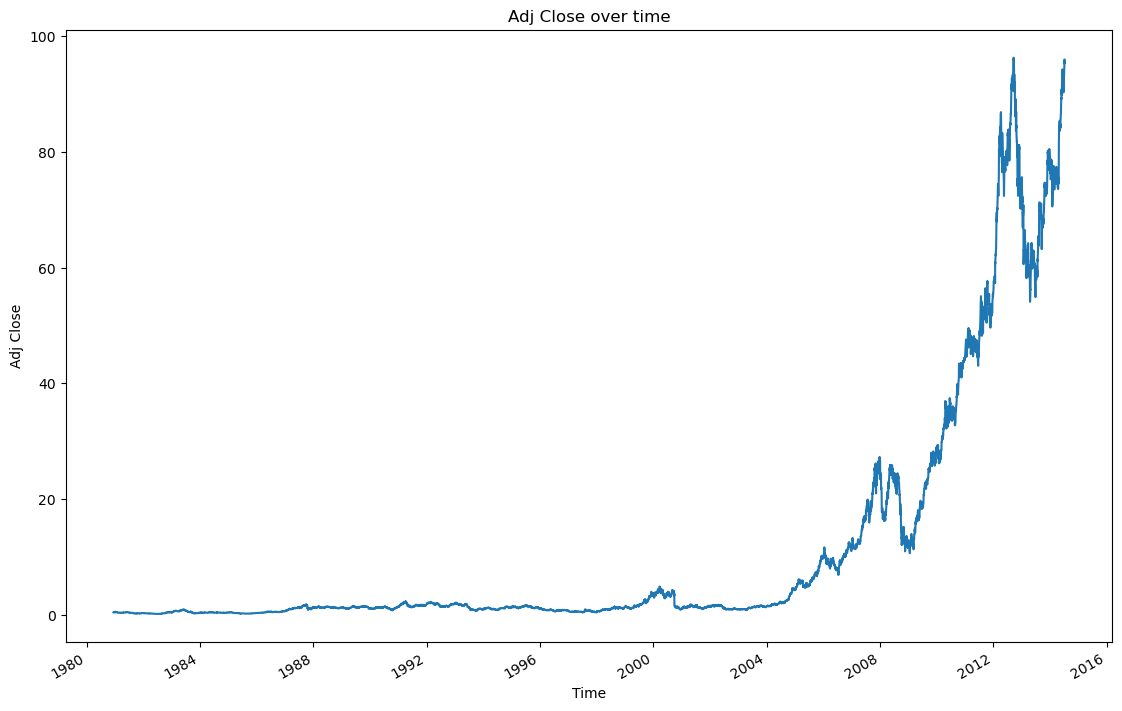

In [12]:
apple['Adj Close'].plot(figsize = [13.5, 9], title = 'Adj Close over time', xlabel = 'Time', ylabel = 'Adj Close')

### BONUS: Create your own question and answer it.